# Introduction to Convolution Neural Networks


In [4]:
# Load necessary packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Load the data
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(10000,)

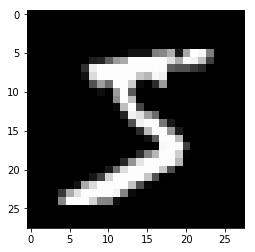

In [7]:
# Understanding the image data format
plt.imshow(X_train[0],cmap='gray')

In [8]:
y_train[0]

5

## Pre-processing
Our MNIST images only have a depth of 1, but we must explicitly declare that

In [9]:
# Preprocessing the image data
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Create, compile and train the model.
![CNN model](images/cnn-model.jpg)

- The first parameter is the number of filters

In [11]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total para

In [12]:
history_cnn = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1136s 19ms/step - loss: 0.0979 - acc: 0.9693 - val_loss: 0.0396 - val_acc: 0.9874
Epoch 2/5
60000/60000 [==============================] - 1169s 19ms/step - loss: 0.0350 - acc: 0.9889 - val_loss: 0.0205 - val_acc: 0.9936
Epoch 3/5
60000/60000 [==============================] - 1076s 18ms/step - loss: 0.0233 - acc: 0.9928 - val_loss: 0.0173 - val_acc: 0.9946
Epoch 4/5
60000/60000 [==============================] - 1175s 20ms/step - loss: 0.0193 - acc: 0.9938 - val_loss: 0.0101 - val_acc: 0.9970
Epoch 5/5
60000/60000 [==============================] - 1211s 20ms/step - loss: 0.0141 - acc: 0.9959 - val_loss: 0.0099 - val_acc: 0.9968


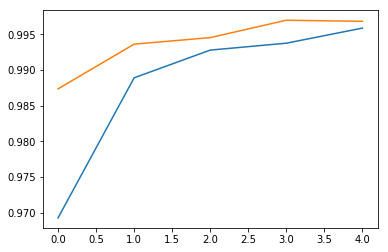

In [14]:
#Plot the accuracy of training and validation set
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

In [ ]:
model.predict()